In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nixtla import NixtlaClient
import os

In [5]:
#api config
nixtla_client = NixtlaClient(
    api_key = 'nixtla-tok-CTYlY4bXXnUAKK84Rw7FhEIhwwYt97jkNGnwkT10totonfAxUky0GkjXVnxIOva5aSszvlxb0fayv9Gi'
)

In [6]:
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

In [7]:
local_path = os.getcwd()

setembro_path = os.path.join(local_path,"desafio", 'setembro.csv')
outubro_path = os.path.join(local_path,"desafio", 'outubro.csv')

setembro_df = pd.read_csv(setembro_path)
outubro_df = pd.read_csv(outubro_path)

setembro_df['Change %'] =  pd.to_numeric(setembro_df['Change %'].str.replace('%',''))
outubro_df['Change %'] =  pd.to_numeric(outubro_df['Change %'].str.replace('%',''))

setembro_df['Vol.'] =  pd.to_numeric(setembro_df['Vol.'].str.replace('K',''))*1000
outubro_df['Vol.'] =  pd.to_numeric(outubro_df['Vol.'].str.replace('K',''))*1000

In [8]:
setembro_df

,Date,Price,Open,High,Low,Vol.,Change %
0,08/19/2024,2.222,2.105,2.245,2.104,104080.0,5.61
1,08/18/2024,2.104,2.129,2.129,2.100,2150.0,-1.17
2,08/17/2024,2.129,2.129,2.129,2.129,NaN,0.28
3,08/16/2024,2.123,2.205,2.216,2.111,140820.0,-3.37
4,08/15/2024,2.197,2.228,2.301,2.189,165420.0,-0.99
...,...,...,...,...,...,...,...
1239,01/08/2020,2.141,2.153,2.185,2.115,242560.0,-0.97
1240,01/07/2020,2.162,2.149,2.178,2.102,163010.0,1.26
1241,01/06/2020,2.135,2.112,2.173,2.099,154680.0,0.23
1242,01/03/2020,2.130,2.129,2.163,2.083,144670.0,0.38


In [9]:
# Convert 'Date' columns to datetime format
setembro_df['Date'] = pd.to_datetime(setembro_df['Date'])
outubro_df['Date'] = pd.to_datetime(outubro_df['Date'])

# Sort by 'Date'
setembro_df.sort_values(by='Date', inplace=True)
outubro_df.sort_values(by='Date', inplace=True)

# Merge dataframes on 'Date' to align them
SetOut_df = pd.merge(setembro_df, outubro_df, on='Date', suffixes=('_setembro', '_outubro'))

# Calculate the difference in 'Price' between the two datasets
SetOut_df['Price_Difference'] = SetOut_df['Price_outubro'] - SetOut_df['Price_setembro']


In [10]:
SetOut_df.dropna(inplace=True)

In [11]:
SetOut_df

,Date,Price_setembro,Open_setembro,High_setembro,Low_setembro,Vol._setembro,Change %_setembro,Price_outubro,Open_outubro,High_outubro,Low_outubro,Vol._outubro,Change %_outubro,Price_Difference
0,2020-01-02,2.122,2.184,2.188,2.116,164570.0,-3.06,2.093,2.152,2.158,2.088,73010.0,-3.01,-0.029
1,2020-01-03,2.130,2.129,2.163,2.083,144670.0,0.38,2.112,2.100,2.133,2.062,61290.0,0.91,-0.018
2,2020-01-06,2.135,2.112,2.173,2.099,154680.0,0.23,2.134,2.095,2.155,2.083,79910.0,1.04,-0.001
3,2020-01-07,2.162,2.149,2.178,2.102,163010.0,1.26,2.153,2.144,2.166,2.103,82700.0,0.89,-0.009
4,2020-01-08,2.141,2.153,2.185,2.115,242560.0,-0.97,2.134,2.148,2.164,2.103,170260.0,-0.88,-0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,2024-08-14,2.219,2.160,2.276,2.144,189930.0,3.31,2.343,2.288,2.395,2.272,126590.0,2.76,0.124
1238,2024-08-15,2.197,2.228,2.301,2.189,165420.0,-0.99,2.332,2.345,2.421,2.317,121870.0,-0.47,0.135
1239,2024-08-16,2.123,2.205,2.216,2.111,140820.0,-3.37,2.247,2.341,2.343,2.237,107160.0,-3.64,0.124
1241,2024-08-18,2.104,2.129,2.129,2.100,2150.0,-1.17,2.231,2.255,2.255,2.225,830.0,-1.06,0.127


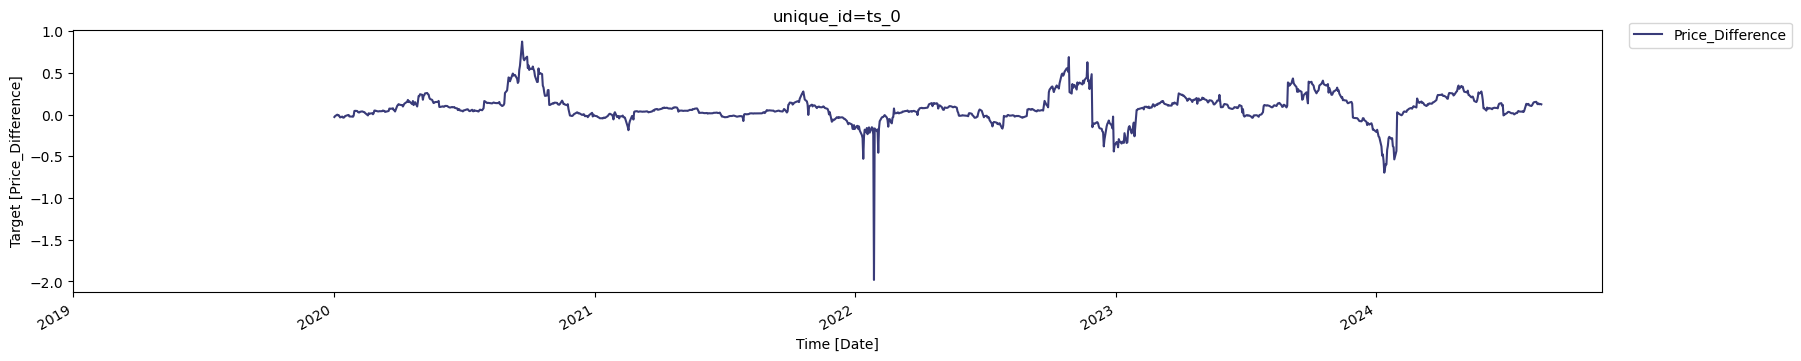

In [12]:
nixtla_client.plot(SetOut_df, time_col='Date', target_col='Price_Difference')

In [13]:
anomalies_df = nixtla_client.detect_anomalies(SetOut_df,freq='D',time_col='Date', target_col="Price_Difference") 

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...
INFO:nixtla.nixtla_client:Using the following exogenous variables: Price_setembro, Open_setembro, High_setembro, Low_setembro, Vol._setembro, Change %_setembro, Price_outubro, Open_outubro, High_outubro, Low_outubro, Vol._outubro, Change %_outubro


In [14]:
anomalies_df

,Date,anomaly,TimeGPT-lo-99,TimeGPT,TimeGPT-hi-99
0,2020-02-11,0,-0.125628,0.037559,0.200745
1,2020-02-12,0,-0.136812,0.026375,0.189561
2,2020-02-13,0,-0.133917,0.029270,0.192456
3,2020-02-14,0,-0.139394,0.023793,0.186979
4,2020-02-15,0,-0.175712,-0.012525,0.150661
...,...,...,...,...,...
1647,2024-08-15,0,-0.040356,0.122831,0.286017
1648,2024-08-16,0,-0.031770,0.131417,0.294603
1649,2024-08-17,0,-0.003368,0.159819,0.323005
1650,2024-08-18,0,-0.001307,0.161880,0.325066


In [15]:
anomalies_df_1 = anomalies_df[anomalies_df["anomaly"]==1]

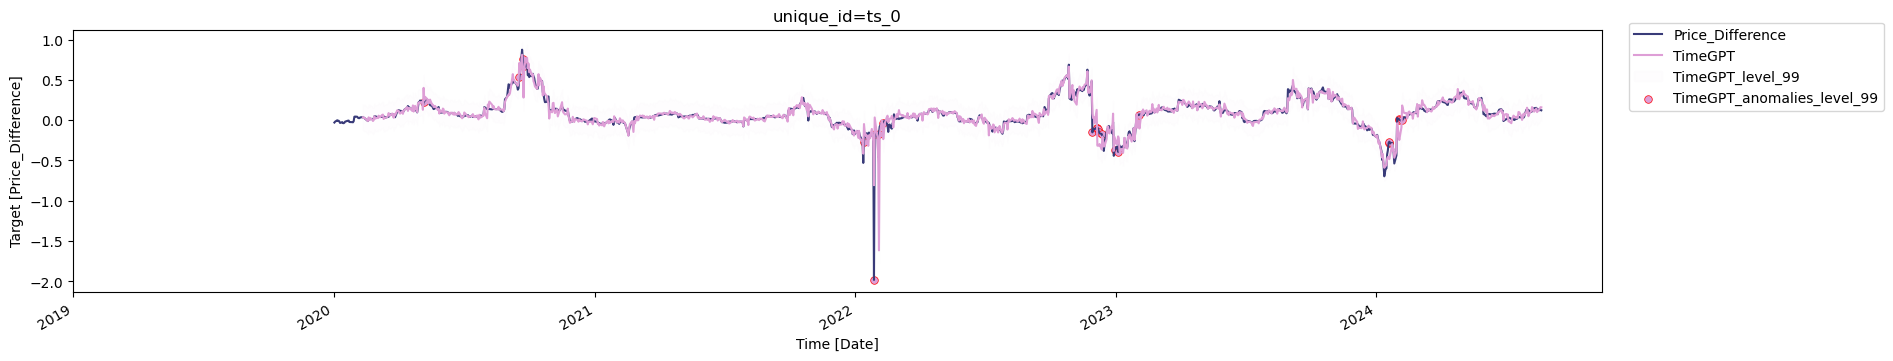

In [16]:
# Plot predictions
nixtla_client.plot(
    SetOut_df,
    anomalies_df, 
    time_col='Date', 
    target_col="Price_Difference"
)

In [17]:
print("Anomalies detected: ", len(anomalies_df[anomalies_df['anomaly'] == 1]))
only_anomalies_df = anomalies_df[anomalies_df['anomaly'] == 1]

Anomalies detected:  27


In [18]:
only_anomalies_df

,Date,anomaly,TimeGPT-lo-99,TimeGPT,TimeGPT-hi-99
85,2020-05-06,1,0.237879,0.401066,0.564252
219,2020-09-17,1,0.546889,0.710075,0.873262
224,2020-09-22,1,0.391742,0.554929,0.718115
225,2020-09-23,1,0.117666,0.280852,0.444039
702,2022-01-13,1,-0.210794,-0.047608,0.115579
716,2022-01-27,1,-0.969898,-0.806711,-0.643525
717,2022-01-28,1,-0.129010,0.034177,0.197363
723,2022-02-03,1,-1.778455,-1.615269,-1.452082
729,2022-02-09,1,-0.398200,-0.235013,-0.071827
1022,2022-11-29,1,-0.082040,0.081147,0.244334


In [19]:
days_w_anomaly = SetOut_df[SetOut_df['Date'].isin(only_anomalies_df['Date'])]

/tmp/ipykernel_14072/881627064.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  days_w_anomaly = SetOut_df[SetOut_df['Date'].isin(only_anomalies_df['Date'])]


In [20]:
days_w_anomaly

,Date,Price_setembro,Open_setembro,High_setembro,Low_setembro,Vol._setembro,Change %_setembro,Price_outubro,Open_outubro,High_outubro,Low_outubro,Vol._outubro,Change %_outubro,Price_Difference
86,2020-05-06,1.944,2.087,2.111,1.929,265470.0,-8.90,2.171,2.267,2.287,2.162,87560.0,-6.10,0.227
179,2020-09-17,2.042,2.254,2.275,1.987,238360.0,-9.93,2.577,2.658,2.665,2.496,172500.0,-3.27,0.535
182,2020-09-22,1.834,1.888,1.897,1.808,102270.0,-0.05,2.597,2.732,2.742,2.561,137020.0,-4.17,0.763
183,2020-09-23,2.125,1.845,2.207,1.815,100580.0,15.87,2.794,2.580,2.841,2.518,202730.0,7.59,0.669
515,2022-01-13,4.270,4.791,4.844,4.245,221610.0,-12.09,4.005,4.296,4.329,3.990,115340.0,-7.44,-0.265
526,2022-01-27,6.265,4.230,7.400,4.230,7180.0,46.48,4.283,4.000,4.420,3.990,193250.0,6.12,-1.982
527,2022-01-28,4.639,4.342,4.876,4.286,263420.0,-25.95,4.473,4.222,4.629,4.192,137040.0,4.44,-0.166
531,2022-02-03,4.888,5.420,5.454,4.816,205840.0,-11.14,4.720,4.966,5.009,4.617,82150.0,-6.42,-0.168
535,2022-02-09,4.009,4.211,4.259,3.983,154600.0,-5.63,3.980,4.178,4.229,3.955,78050.0,-5.64,-0.029
752,2022-11-29,7.235,7.319,7.421,7.092,101680.0,7.79,7.084,7.120,7.249,6.944,38400.0,-1.56,-0.151


In [31]:
anomaly_info = anomalies_df[anomalies_df["anomaly"]==1]
not_anomaly = anomalies_df[anomalies_df["anomaly"] !=1]
anomaly_info

,Date,anomaly,TimeGPT-lo-99,TimeGPT,TimeGPT-hi-99
85,2020-05-06,1,0.237879,0.401066,0.564252
219,2020-09-17,1,0.546889,0.710075,0.873262
224,2020-09-22,1,0.391742,0.554929,0.718115
225,2020-09-23,1,0.117666,0.280852,0.444039
702,2022-01-13,1,-0.210794,-0.047608,0.115579
716,2022-01-27,1,-0.969898,-0.806711,-0.643525
717,2022-01-28,1,-0.129010,0.034177,0.197363
723,2022-02-03,1,-1.778455,-1.615269,-1.452082
729,2022-02-09,1,-0.398200,-0.235013,-0.071827
1022,2022-11-29,1,-0.082040,0.081147,0.244334


In [30]:
mean_timegpt_lo99 = anomaly_info["TimeGPT-lo-99"].mean()
mean_Timegpt = anomaly_info["TimeGPT"].mean()
print("timegptlo99 =", mean_timegpt_lo99)
print("TImeGpt =", mean_Timegpt)

timegptlo99 = -0.31110019617342166
TImeGpt = -0.1479136342478722


In [32]:
not_mean_timegpt_lo99 = not_anomaly["TimeGPT-lo-99"].mean()
not_mean_Timegpt = not_anomaly["TimeGPT"].mean()
print("timegptlo99 =", not_mean_timegpt_lo99)
print("TImeGpt =", not_mean_Timegpt)

timegptlo99 = -0.0787500086847766
TImeGpt = 0.08443655324077279


In [33]:
not_anomaly["TimeGPT"].max()

0.818853516444218

In [ ]:
not_anomaly["TimeGPT"].min()

In [22]:
SetOut_df

,Date,Price_setembro,Open_setembro,High_setembro,Low_setembro,Vol._setembro,Change %_setembro,Price_outubro,Open_outubro,High_outubro,Low_outubro,Vol._outubro,Change %_outubro,Price_Difference
0,2020-01-02,2.122,2.184,2.188,2.116,164570.0,-3.06,2.093,2.152,2.158,2.088,73010.0,-3.01,-0.029
1,2020-01-03,2.130,2.129,2.163,2.083,144670.0,0.38,2.112,2.100,2.133,2.062,61290.0,0.91,-0.018
2,2020-01-06,2.135,2.112,2.173,2.099,154680.0,0.23,2.134,2.095,2.155,2.083,79910.0,1.04,-0.001
3,2020-01-07,2.162,2.149,2.178,2.102,163010.0,1.26,2.153,2.144,2.166,2.103,82700.0,0.89,-0.009
4,2020-01-08,2.141,2.153,2.185,2.115,242560.0,-0.97,2.134,2.148,2.164,2.103,170260.0,-0.88,-0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,2024-08-14,2.219,2.160,2.276,2.144,189930.0,3.31,2.343,2.288,2.395,2.272,126590.0,2.76,0.124
1238,2024-08-15,2.197,2.228,2.301,2.189,165420.0,-0.99,2.332,2.345,2.421,2.317,121870.0,-0.47,0.135
1239,2024-08-16,2.123,2.205,2.216,2.111,140820.0,-3.37,2.247,2.341,2.343,2.237,107160.0,-3.64,0.124
1241,2024-08-18,2.104,2.129,2.129,2.100,2150.0,-1.17,2.231,2.255,2.255,2.225,830.0,-1.06,0.127


(27,)
(23,)


ValueError: x and y must be the same size

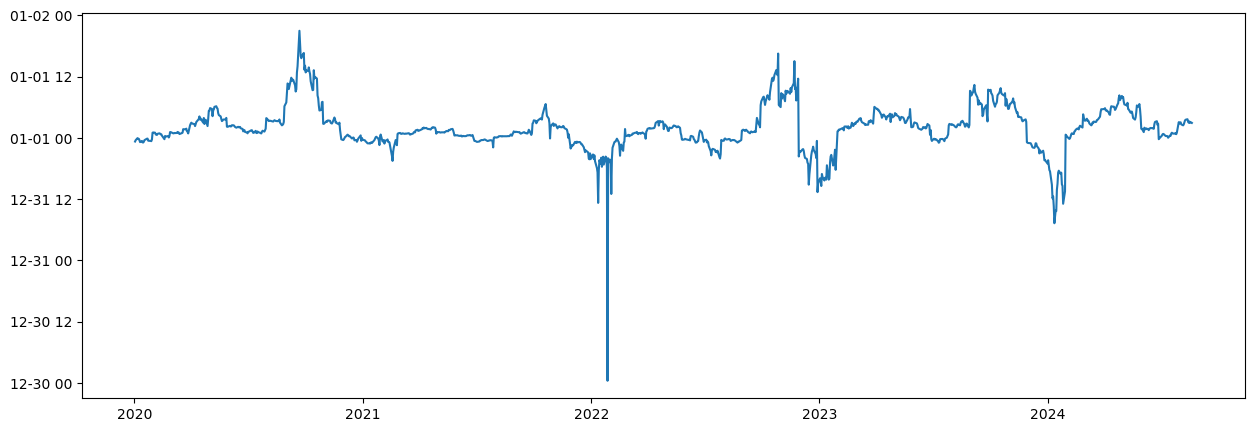

In [23]:

fig, axes = plt.subplots(1, 1, figsize=(15, 5))

# Plot va, vb, vc in separate subplots
axes.plot(SetOut_df['Date'], SetOut_df['Price_Difference'], label='Price_Difference')

# Highlight anomalies
anomaly_timestamps = anomalies_df[anomalies_df['anomaly'] == 1]['Date']
anomaly_real = days_w_anomaly['Date']

print(anomaly_timestamps.shape)
print(anomaly_real.shape)

axes.scatter(anomaly_timestamps, anomaly_real, color='red', label='anomaly', s=50, marker='o')

# Add grid, labels, and titles

axes.grid(True)
axes.set_ylabel('Price Difference')
axes.legend()

axes.set_xlabel('Date')
fig.suptitle('Anomalies detected in Price Difference')

plt.tight_layout()
plt.show()
